In [99]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import Week
import re


In [100]:
# Load Data
data_dir = os.path.join('data')
print(data_dir)
file_path = os.path.abspath(os.path.join(data_dir, 'DishpatchSubscriptionData_NIklas_Sanitised - subscriptions (2).csv'))
df = pd.read_csv(file_path)

# Preprocessing

for col in df.columns:
    if col.endswith('(UTC)'):
        df[col] = pd.to_datetime(df[col])

df.dtypes

today = pd.Timestamp.today().normalize()

df['Trial End (UTC) + 2 Weeks'] = df['Trial End (UTC)'] + pd.Timedelta(weeks=2)

data


/var/folders/2c/jlpbrr154jg9cfp1pzbh8x5h0000gn/T/ipykernel_11151/2616415722.py:5: DtypeWarning: Columns (2,21,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [101]:
df.columns

Index(['id', 'Customer ID', 'Customer Description', 'Customer Name', 'Plan',
       'Product', 'Product ID', 'Quantity', 'Currency', 'Cancellation Reason',
       'Interval', 'Amount', 'Status', 'Created (UTC)', 'Start (UTC)',
       'Start Date (UTC)', 'Current Period Start (UTC)',
       'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
       'Application Fee Percent', 'Coupon', 'Tax Percent', 'Canceled At (UTC)',
       'Cancel At Period End', 'Ended At (UTC)', 'Exclusive Tax Rate',
       'Inclusive Tax Rate', 'Automatic Tax Enabled',
       'Tax Location Recognized', 'kind (metadata)',
       'senderShopifyCustomerId (metadata)', 'shopifyCustomerId (metadata)',
       'previousEndDate (metadata)', 'Trial End (UTC) + 2 Weeks'],
      dtype='object')

In [102]:
df['Created (UTC)']

0       2025-05-23 09:22:00
1       2025-05-23 09:15:00
2       2025-05-23 08:57:00
3       2025-05-23 08:32:00
4       2025-05-23 07:14:00
                ...        
20438   2023-09-25 09:29:00
20439   2023-09-25 09:22:00
20440   2023-09-25 09:05:00
20441   2023-09-25 09:04:00
20442   2023-09-25 09:04:00
Name: Created (UTC), Length: 20443, dtype: datetime64[ns]

In [103]:
df['Customer Description'].value_counts()
df['id'].value_counts()
df['Customer ID'].value_counts()
df[df['Customer ID'] == 'cus_Pqte3EKNLHrKDd']

,id,Customer ID,Customer Description,Customer Name,Plan,Product,Product ID,Quantity,Currency,Cancellation Reason,...,Ended At (UTC),Exclusive Tax Rate,Inclusive Tax Rate,Automatic Tax Enabled,Tax Location Recognized,kind (metadata),senderShopifyCustomerId (metadata),shopifyCustomerId (metadata),previousEndDate (metadata),Trial End (UTC) + 2 Weeks
9854,sub_1PRDMoCZ9aYYH5wi1n8RuePj,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 13:36:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 13:07:00
9855,sub_1PRDGyCZ9aYYH5wihx6owUAw,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 13:05:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 13:01:00
9859,sub_1PRBsbCZ9aYYH5wiO3anscEy,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 12:59:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 11:31:00
9861,sub_1PRBMPCZ9aYYH5wi2xytKD0d,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 10:58:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 10:58:00
9863,sub_1PRB4QCZ9aYYH5wifqW3E0o7,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 10:55:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 10:39:00
9867,sub_1PRAHyCZ9aYYH5wiih9rvSj4,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-13 10:09:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-07-07 09:49:00
10385,sub_1POME8CZ9aYYH5wi6D96uIfv,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-05 16:02:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-06-29 15:58:00
10386,sub_1POME6CZ9aYYH5wioPGJLc6M,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-05 16:02:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-06-29 15:58:00
10387,sub_1POMBICZ9aYYH5wiZTEx8t6o,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-05 16:02:00,NaN,NaN,False,True,Migrated OG Member,NaN,NaN,NaN,2024-06-29 15:55:00
10861,sub_1PEa9zCZ9aYYH5wivVxXxkfY,cus_Pqte3EKNLHrKDd,NaN,Customer8877,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,2024-06-05 16:22:00,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2024-05-23 16:59:00


In [104]:
# How many full members (e.g. members who have completed their trial,
# have an active membership and are not gifted members)
# did we have at the start of each week, since Sep 2023?
full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Status'] == 'active') &                          # is active
    (df['Canceled At (UTC)'].isna())                     # not cancelled
]
full_members


# How many new full members joined during each week
new_full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Status'] == 'active') &                         # is active
    (df['Canceled At (UTC)'].isna()) &                   # not cancelled
    (df['Trial End (UTC) + 2 Weeks'].between(today - pd.Timedelta(weeks=1), today))
]
new_full_members

# How many new members signed up to trial each week since 2023?
new_trial_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial Start (UTC)'].between(today - pd.Timedelta(weeks=1), today))
]
new_trial_members


# How many of each weekly cohort converted trial -> full membership


,id,Customer ID,Customer Description,Customer Name,Plan,Product,Product ID,Quantity,Currency,Cancellation Reason,...,Ended At (UTC),Exclusive Tax Rate,Inclusive Tax Rate,Automatic Tax Enabled,Tax Location Recognized,kind (metadata),senderShopifyCustomerId (metadata),shopifyCustomerId (metadata),previousEndDate (metadata),Trial End (UTC) + 2 Weeks
6,sub_1RReBqCZ9aYYH5wiERZnm0iQ,cus_SMMvGmEFBV3MlN,NaN,Customer7,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-15 18:50:00
7,sub_1RRd1NCZ9aYYH5wilVyz8xWz,cus_SMLiGZnscsfXk9,NaN,Customer8,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-15 17:35:00
9,sub_1RRbU3CZ9aYYH5wi2vrJLfdD,cus_SMK893dv66dZG3,NaN,Customer10,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-15 15:56:00
10,sub_1RRaSmCZ9aYYH5wiUla0R4fS,cus_SMJ43Z2B22iTpE,NaN,Customer11,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,False,NaN,NaN,NaN,NaN,2025-06-15 14:51:00
11,sub_1RRZMhCZ9aYYH5wi53yu2qaD,cus_SMHwC5ARVJ8u38,NaN,Customer12,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-15 13:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,sub_1RPSEfCZ9aYYH5wiofSNMryT,cus_SK6RjFym34Bm0w,NaN,Customer117,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-09 17:39:00
120,sub_1RPRojCZ9aYYH5wiRhhwVSIR,cus_SK60aL2SjPFhCR,NaN,Customer119,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,cancellation_requested,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-09 17:13:00
124,sub_1RPNRzCZ9aYYH5wiciMOdG57,cus_SK1UKdIfASThPC,NaN,Customer122,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,True,NaN,NaN,NaN,NaN,2025-06-09 12:33:00
125,sub_1RPMJSCZ9aYYH5wi7urArZeT,cus_SK0KfVe9hBLQtq,NaN,Customer123,price_1NtA9QCZ9aYYH5wiWREHw9hP,Supper Club,prod_OgXDYvxWJuUaYt,1,gbp,NaN,...,NaT,NaN,NaN,False,False,NaN,NaN,NaN,NaN,2025-06-09 11:20:00


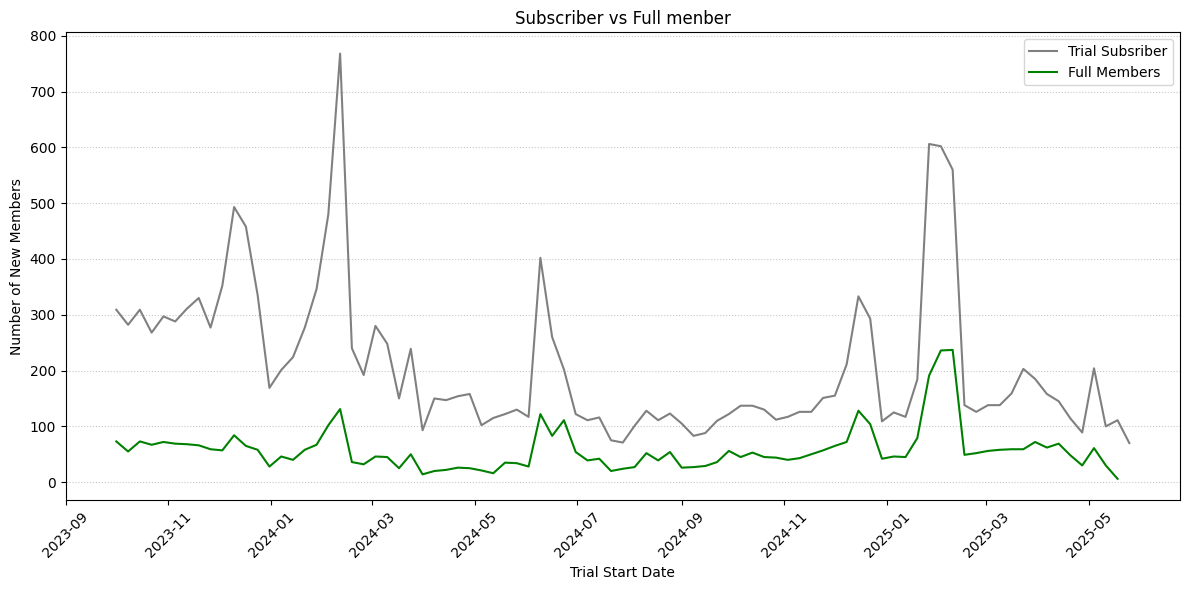

Total number of full members: 4987
Total number of members: 20443


In [105]:
plt.figure(figsize=(12, 6))

# Group by Trial Start date and count new members by week
new_members_by_date = df.groupby(pd.Grouper(key='Trial Start (UTC)', freq='W')).size()
new_full_members_by_date = full_members.groupby(pd.Grouper(key='Trial Start (UTC)', freq='W')).size()

# Create line plot
plt.plot(new_members_by_date.index, new_members_by_date.values, color='grey', label='Trial Subsriber')
plt.plot(new_full_members_by_date.index, new_full_members_by_date.values, color='green', label='Full Members')

plt.xlabel('Trial Start Date')
plt.ylabel('Number of New Members')
plt.title('Subscriber vs Full menber')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Total number of full members: {len(full_members)}")
print(f"Total number of members: {len(df)}")

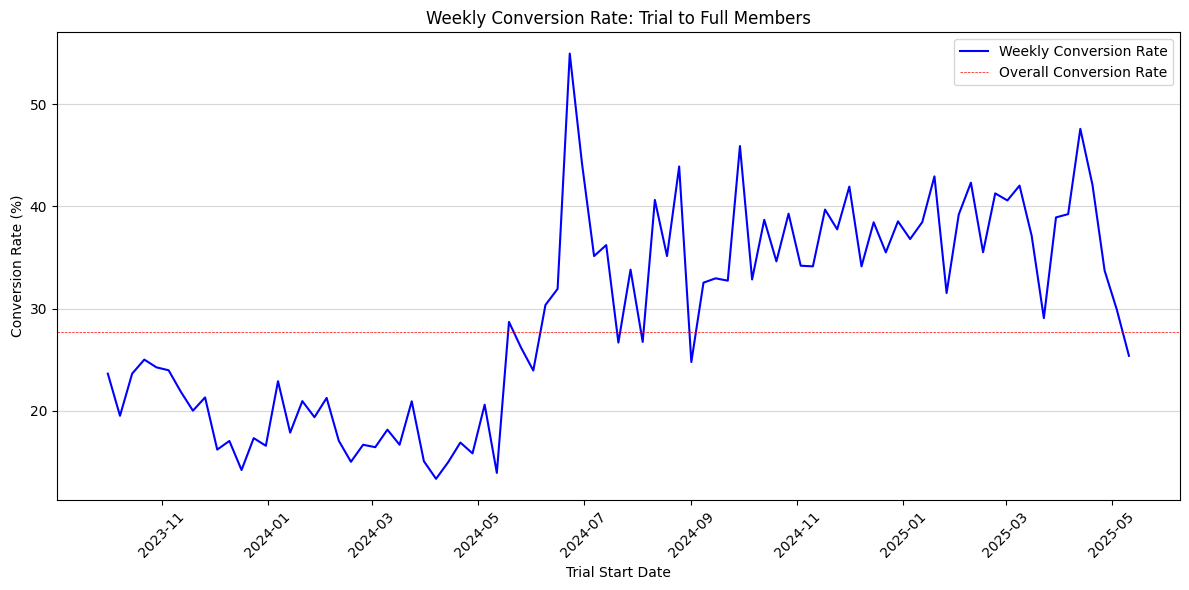

Historical Conversion Rate: 27.7%


In [117]:
# Calculate conversion rate between trial subscribers and full members
plt.figure(figsize=(12, 6))

# Filter data to only include trials that started at least 2 weeks ago (LAST 2 WEEKS not included)
cutoff_date = today - pd.Timedelta(weeks=2)
historical_trials = df[df['Trial Start (UTC)'] <= cutoff_date]

# Group by Trial Start date and count new members by week
new_members_by_date = historical_trials.groupby(pd.Grouper(key='Trial Start (UTC)', freq='W')).size()

# Get full members from those historical trials
historical_full_members = full_members[full_members['Trial Start (UTC)'] <= cutoff_date]
new_full_members_by_date = historical_full_members.groupby(pd.Grouper(key='Trial Start (UTC)', freq='W')).size()

# Calculate conversion rate, handling division by zero
conversion_rate = pd.Series(0.0, index=new_members_by_date.index)
mask = new_members_by_date != 0
conversion_rate[mask] = (new_full_members_by_date[mask] / new_members_by_date[mask]) * 100

# Calculate overall conversion rate
overall_rate = len(historical_full_members)/len(historical_trials)*100

# add a new ligne for last year conversion rate
last_year_rate = len(full_members)/len(df)*100

# Create line plot
plt.plot(conversion_rate.index, conversion_rate.values, color='blue', label='Weekly Conversion Rate')
plt.axhline(y=overall_rate, color='red', linestyle='--', label='Overall Conversion Rate', linewidth=0.5)

plt.xlabel('Trial Start Date')
plt.ylabel('Conversion Rate (%)')
plt.title('Weekly Conversion Rate: Trial to Full Members')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Historical Conversion Rate: {round(overall_rate, 2)}%")


In [107]:
# How many full members (e.g. members who have completed their trial,
# have an active membership and are not gifted members)
# did we have at the start of each week, since Sep 2023?
full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Status'] == 'active') &                          # is active
    (df['Canceled At (UTC)'].isna())                     # not cancelled
]

# How many new, full members joined during each week
new_full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial End (UTC)'] < today) & # Trial Over
    (df['Status'] == 'active') # is active
]

# How many new members signed up to trial each week since 2023?
new_trial_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial Start (UTC)'] < today) &                  # Trial Over
    (df['Status'] == 'active')                           # is active
]

# How many of each weekly cohort converted trial -> full membership


# How many cancelled before the end of their trial date
members_cancel_during_trial = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Canceled At (UTC)'] < df['Trial End (UTC)'])    # Cancel during trial
]

# How many requested a refund within 2 weeks of their full membership starting
members_cancel_2_weeks_after_trial_end = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Canceled At (UTC)'] < df['Trial End (UTC) + 2 Weeks'])
]

# How many of each weekly cohort renewed from Year 1 -> Year 2

# How many cancelled before the end of Year 1 membership

# How many requested a refund within 2 weeks of their Year 2 membership starting


In [108]:
df['Product'].value_counts()

Supper Club    20442
RENEW TEST         1
Name: Product, dtype: int64

In [109]:
# Generate Weekly Dates starting from September 2023
start_week = pd.Timestamp('2023-09-25')
weeks = pd.date_range(start=start_week, end=today, freq='W-MON')  # Weeks starting Monday

In [110]:
# Initialize DataFrame for weekly metrics
weekly_metrics = pd.DataFrame(index=weeks)
weekly_metrics.index.name = 'Week Start Date'

In [111]:
weekly_metrics['Full Members'] = [
    df[
        df['senderShopifyCustomerId (metadata)'].isna() &
        (df['Trial End (UTC)'] < week_start) &
        (
            df['Canceled At (UTC)'].isna() |
            (df['Canceled At (UTC)'] >= week_start)
        )
    ].shape[0]
    for week_start in weeks
]

# 2. New Full Members During Each Week
weekly_metrics['New Full Members'] = [
    df[
        df['senderShopifyCustomerId (metadata)'].isna() &
        (df['Trial End (UTC)'] >= week_start) &
        (df['Trial End (UTC)'] < week_start + Week(1)) &
        (
            df['Canceled At (UTC)'].isna() |
            (df['Canceled At (UTC)'] >= df['Trial End (UTC)'])
        )
    ].shape[0]
    for week_start in weeks
]

# 3. New Trial Members Each Week
weekly_metrics['New Trial Members'] = [
    df[
        df['senderShopifyCustomerId (metadata)'].isna() &
        (df['Trial Start (UTC)'] >= week_start) &
        (df['Trial Start (UTC)'] < week_start + Week(1)) &
        (df['Status'] == 'active')
    ].shape[0]
    for week_start in weeks
]

# 4. Cohort Conversion Rate (Trial to Full)
cohort_data = df[df['senderShopifyCustomerId (metadata)'].isna()].copy()
cohort_data['Trial Start Week'] = cohort_data['Trial Start (UTC)'].dt.to_period('W').dt.start_time
conversion_rates = cohort_data.groupby('Trial Start Week').apply(
    lambda x: x[(x['Trial End (UTC)'].notna()) &
    ((x['Canceled At (UTC)'].isna()) | (x['Canceled At (UTC)'] >= x['Trial End (UTC)']))].shape[0]
)
weekly_metrics = weekly_metrics.join(conversion_rates.rename('Cohort Conversion'), how='left')

# 5. Members Cancelled During Trial
cancelled_during_trial = df[
    df['senderShopifyCustomerId (metadata)'].isna() &
    (df['Canceled At (UTC)'] < df['Trial End (UTC)'])
].groupby(df['Canceled At (UTC)'].dt.to_period('W').dt.start_time).size()
weekly_metrics = weekly_metrics.join(cancelled_during_trial.rename('Cancelled During Trial'), how='left')

# 6. Refunds Within 2 Weeks Post-Trial
refunds_2_weeks = df[
    (df['senderShopifyCustomerId (metadata)'].isna() &
    (df['Canceled At (UTC)'] >= df['Trial End (UTC)']) &
    (df['Canceled At (UTC)'] <= df['Trial End (UTC)'] + pd.Timedelta(weeks=2)))
].groupby(df['Canceled At (UTC)'].dt.to_period('W').dt.start_time).size()
weekly_metrics = weekly_metrics.join(refunds_2_weeks.rename('Refunds Within 2 Weeks'), how='left')

# Fill missing values with 0
weekly_metrics.fillna(0, inplace=True)

weekly_metrics

,Full Members,New Full Members,New Trial Members,Cohort Conversion,Cancelled During Trial,Refunds Within 2 Weeks
Week Start Date,,,,,,
2023-09-25,0,1,74,225,7,0.0
2023-10-02,1,0,55,207,30,0.0
2023-10-09,1,200,74,235,129,8.0
2023-10-16,193,209,68,213,83,15.0
2023-10-23,387,399,72,218,71,104.0
...,...,...,...,...,...,...
2025-04-21,4940,98,30,59,38,40.0
2025-04-28,4958,68,61,162,37,30.0
2025-05-05,4967,148,30,67,25,85.0


In [112]:
five_week = weekly_metrics.loc['2025-03-31':'2025-05-28']

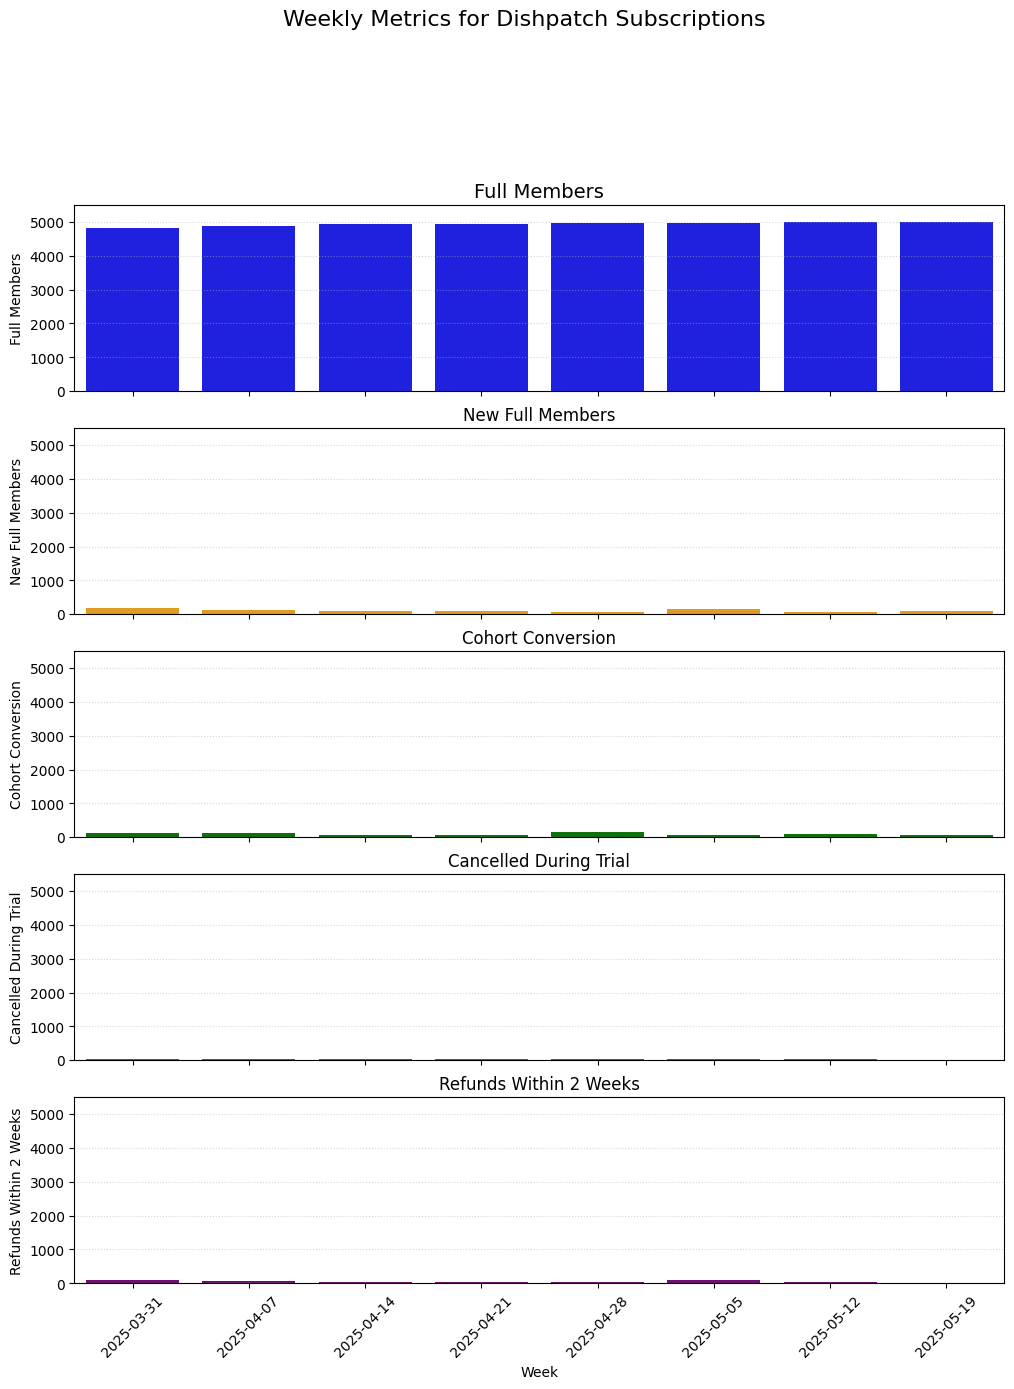

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assurer que l'index est bien de type datetime
five_week.index = pd.to_datetime(five_week.index)

# Liste des métriques à tracer
metrics = [
    ('Full Members', 'blue'),
    ('New Full Members', 'orange'),
    ('Cohort Conversion', 'green'),
    ('Cancelled During Trial', 'red'),
    ('Refunds Within 2 Weeks', 'purple')
]

# Déterminer la valeur maximale globale pour fixer la même échelle Y
y_max = max(five_week[metric].max() for metric, _ in metrics)

# Création des subplots
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 14), sharex=True)

# Tracer chaque graphique
for ax, (metric, color) in zip(axes, metrics):
    sns.barplot(data=five_week, x=five_week.index, y=metric, ax=ax, color=color)
    ax.set_title(metric)
    ax.set_ylim(0, y_max * 1.1)  # Ajout de marge en haut
    ax.grid(axis='y', linestyle='dotted', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)  # Rotation pour lisibilité

# Ajouter un label commun à l'axe X
axes[-1].set_xlabel('Week')
# Supprimer la ligne incorrecte, car les titres sont déjà définis dans la boucle
# Si vous souhaitez personnaliser le titre du premier graphique :
axes[0].set_title('Full Members', fontsize=14)

# Titre global
plt.suptitle('Weekly Metrics for Dishpatch Subscriptions', fontsize=16, y=1.02)
plt.show()

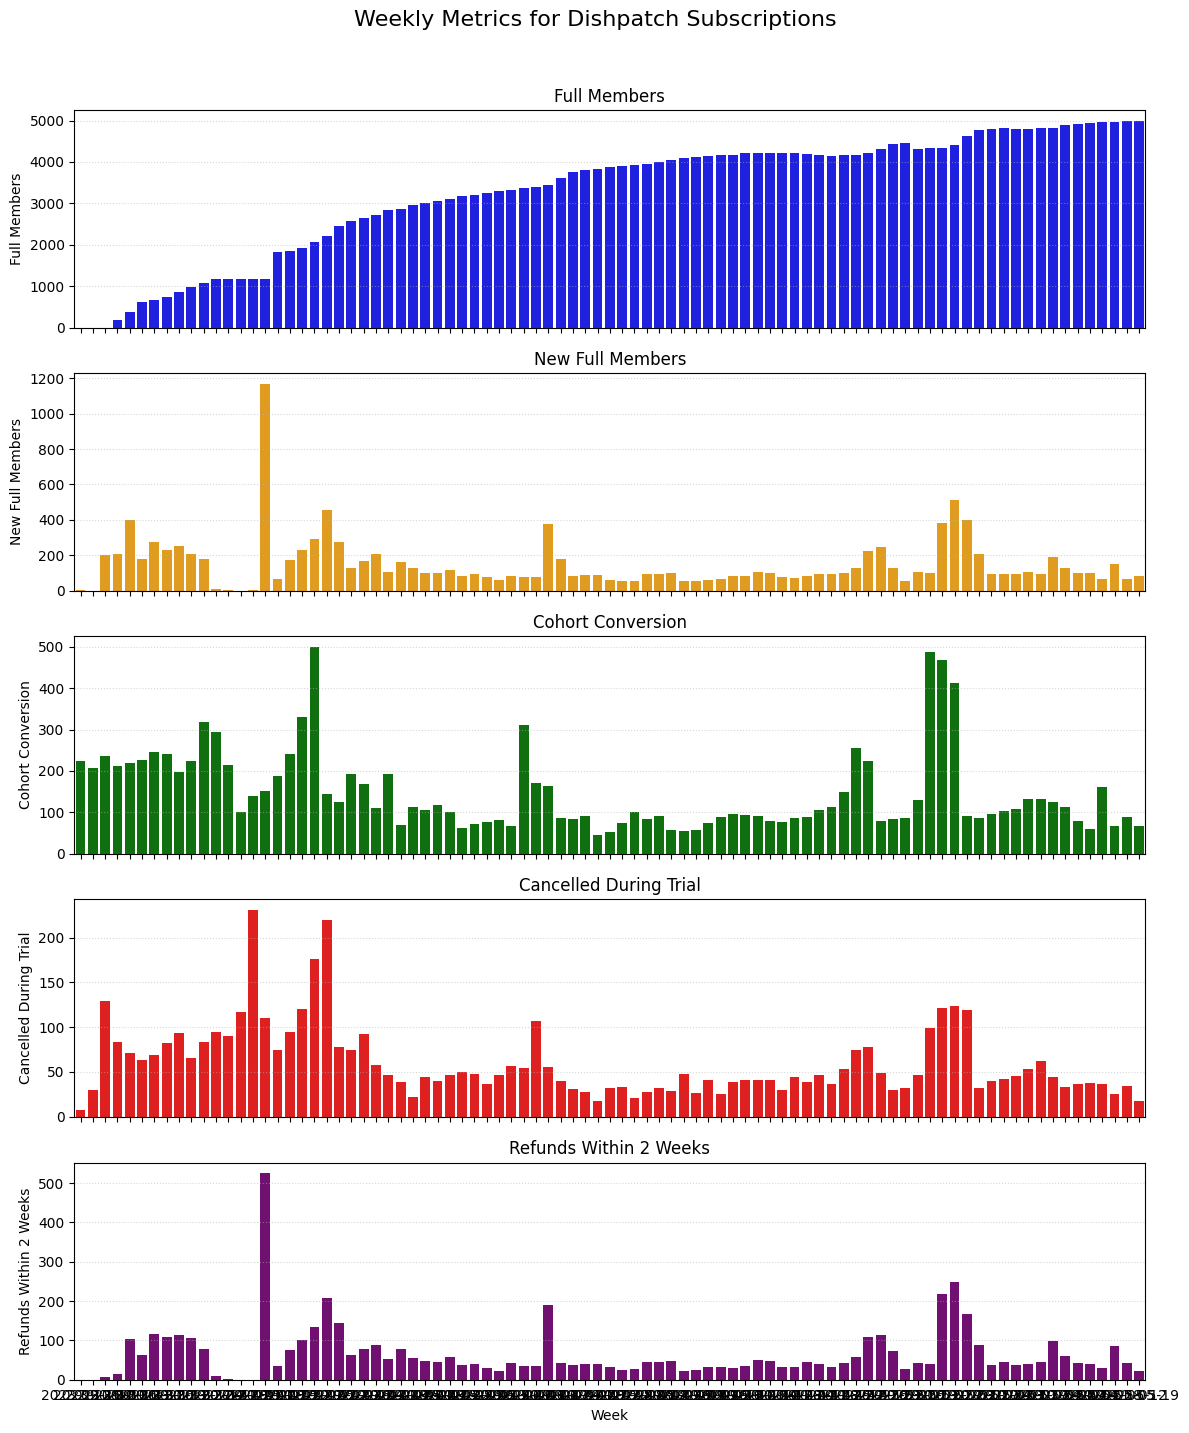

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = [
    ('Full Members', 'blue'),
    ('New Full Members', 'orange'),
    ('Cohort Conversion', 'green'),
    ('Cancelled During Trial', 'red'),
    ('Refunds Within 2 Weeks', 'purple')
]

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 14), sharex=True)

for ax, (metric, color) in zip(axes, metrics):
    sns.barplot(data=weekly_metrics, x=weekly_metrics.index, y=metric, ax=ax, color=color)
    ax.set_title(metric)
    ax.grid(axis='y', linestyle='dotted', alpha=0.5)

axes[-1].set_xlabel('Week')
plt.suptitle('Weekly Metrics for Dishpatch Subscriptions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

KeyError: 'Full Menbers'

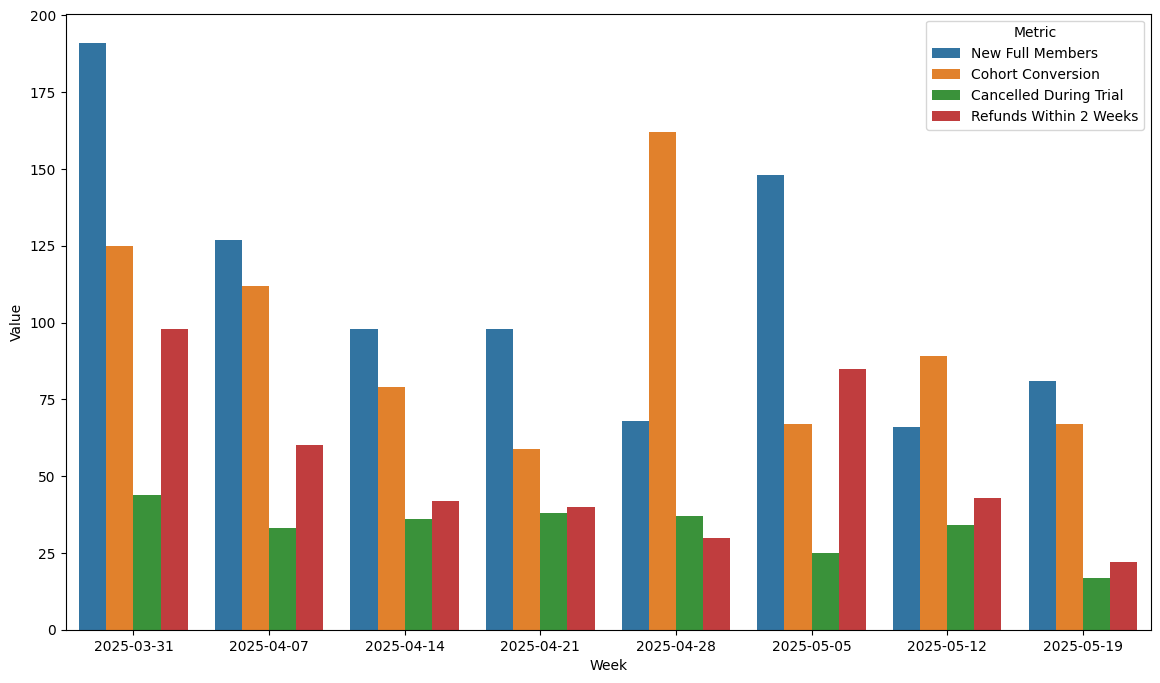

In [115]:
# Assurer que l'index est bien datetime
five_week.index = pd.to_datetime(five_week.index)

# Transformer en format long
long_df = five_week.reset_index().melt(
    id_vars='Week Start Date',
    value_vars=[
        #'Full Members',
        'New Full Members',
        'Cohort Conversion',
        'Cancelled During Trial',
        'Refunds Within 2 Weeks'
    ],
    var_name='Metric',
    value_name='Value'
)

# Renommer l'axe x si nécessaire
long_df.rename(columns={'Week Start Date': 'Week'}, inplace=True)

# Plot
plt.figure(figsize=(14, 8))

sns.barplot(data=long_df, x='Week', y='Value', hue='Metric')
sns.barplot(data=long_df, x='Week', y=five_week['Full Menbers'])

plt.title('Weekly Metrics for Dishpatch Subscriptions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='dotted', alpha=0.6)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# TODO

This week new full nember :
last year new full menber :
last week new full member :
last month mean new full menber by week :
last 6 month mean new full menber by week :

sns.barplot(
    This week new full nember :
    last year new full menber :
    last week new full member :
    last month mean new full menber by week :
    last 6 month mean new full menber by week:
)


This week new subsriber nember :
last year new subsriber menber :
last week new subsriber member :
last month mean new subsriber menber by week :
last 6 month mean new subsriber menber by week:

sns.barplot(
    This week new subsriber nember :
    last year new subsriber menber :
    last week new subsriber member :
    last month mean new subsriber menber by week :
    last 6 month mean new subsriber menber by week:
)

This week camenbert : total new subscriber - new full menber / cancel during TRIAL / cancel after TRIAL
Last week camenbert : total new subscriber - new full menber / cancel during TRIAL / cancel after TRIAL
last week : total new subscriber - new full menber / cancel during TRIAL / cancel after TRIAL
last month : total new subscriber - new full menber / cancel during TRIAL / cancel after TRIAL
last 6 month : total new subscriber - new full menber / cancel during TRIAL / cancel after TRIAL

sns.lineplot()
TOTAL full menber
TOTAL new 

sns.lineplot()
CONVERSION RATE new full menber - (cancel during TRIAL + cancel after TRIAL)





